<a href="https://colab.research.google.com/github/isaacbyr/Practice-Projects/blob/main/Grades_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is kaggle dataset which looks at the grade school students performance on 3 differerent exams. It contains features such as gender, lunch status (free lunch or not), and race/ethnicity. I am going to peform a analysis and visualization of the dataset so I can figure out more about it

### Importing Libraries, dataset and previewing Data

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"isaacbyr","key":"5881667892cb724f4234844a7f6ae768"}'}

In [50]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [51]:
!kaggle datasets download -d spscientist/students-performance-in-exams

students-performance-in-exams.zip: Skipping, found more recently modified local copy (use --force to force download)


In [52]:
!mkdir students-performance
!mv students-performance-in-exams.zip students-performance

In [53]:
%cd students-performance/

/content/students-performance/students-performance


In [54]:
!unzip students-performance-in-exams.zip

Archive:  students-performance-in-exams.zip
  inflating: StudentsPerformance.csv  


In [55]:
df = pd.read_csv("/content/students-performance/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [57]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [59]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [60]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

###Exploring the Data

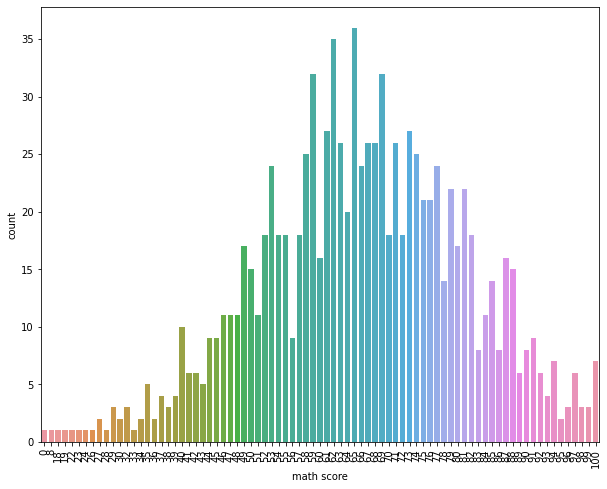

In [61]:
# lets start with the students math score
f, ax = plt.subplots(figsize = (10,8))

sns.countplot(data=df, x='math score')
plt.xticks(rotation = 'vertical')
plt.show()

In [62]:
# As we can the above graph is alittle compact and messy. Lets clean this up a bit by grouping the scores

bins = range(0,100,5)

df['math_score_cat'] = pd.cut(df['math score'], bins = bins)

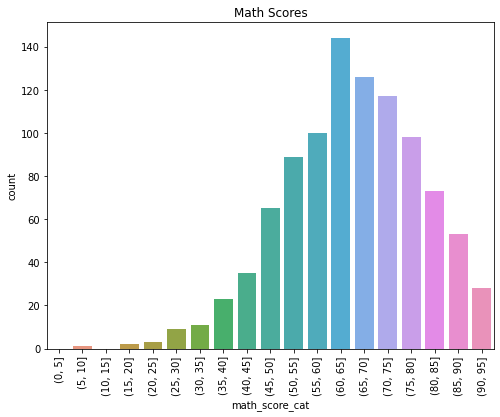

In [63]:
f, ax = plt.subplots(figsize = (8,6))

sns.countplot(data=df, x='math_score_cat')
plt.xticks(rotation = '90')
plt.title('Math Scores')
plt.show()

# There we go, this graph is a lot less clustered and easier to visuaulize what is going on. We can see that most of the math scores fall in the range of 60-65

How many students passed the math exam?

In [64]:
passing_grade = 50

df['pass_math'] = np.where(df['math score'] >= passing_grade, 'P', 'F')
df['pass_math'].value_counts() / len(df) * 100

P    86.5
F    13.5
Name: pass_math, dtype: float64

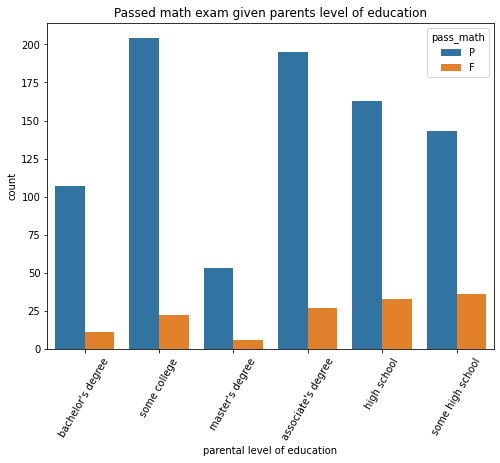

In [65]:
f, ax = plt.subplots(figsize = (8,6))

sns.countplot(data=df, x='parental level of education', hue='pass_math')
plt.xticks(rotation = '60')
plt.title('Passed math exam given parents level of education')
plt.show()

#we can see that if the parents only education was highschool or 'some' highschool their kids were more likely to fail the math exam

Finding out what percentage of students passed the exam given parents level of education

In [66]:
masters_pass= df[(df['parental level of education'] == "master's degree") & (df['pass_math'] == 'P')]
masters_pass
#gives us the list of all the people who passed given their parents have a master's degree

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_score_cat,pass_math
2,female,group B,master's degree,standard,none,90,95,93,"(85, 90]",P
14,female,group A,master's degree,standard,none,50,53,58,"(45, 50]",P
25,male,group A,master's degree,free/reduced,none,73,74,72,"(70, 75]",P
29,female,group D,master's degree,standard,none,62,70,75,"(60, 65]",P
32,female,group E,master's degree,free/reduced,none,56,72,65,"(55, 60]",P
79,female,group E,master's degree,standard,none,62,68,68,"(60, 65]",P
106,female,group D,master's degree,standard,none,87,100,100,"(85, 90]",P
128,male,group D,master's degree,standard,none,82,82,74,"(80, 85]",P
130,male,group D,master's degree,standard,none,89,84,82,"(85, 90]",P
164,female,group E,master's degree,standard,none,81,92,91,"(80, 85]",P


In [67]:
masters_pass_rate = len(masters_pass )/ len(df[df['parental level of education'] == "master's degree"])
masters_pass_rate * 100

89.83050847457628

Looking at writing score

In [69]:
# first we will clean up writing score for plotting like we did for math score

bins = np.arange(0,100,5)

df['writing_score_cat'] = pd.cut(df['writing score'], bins=bins)

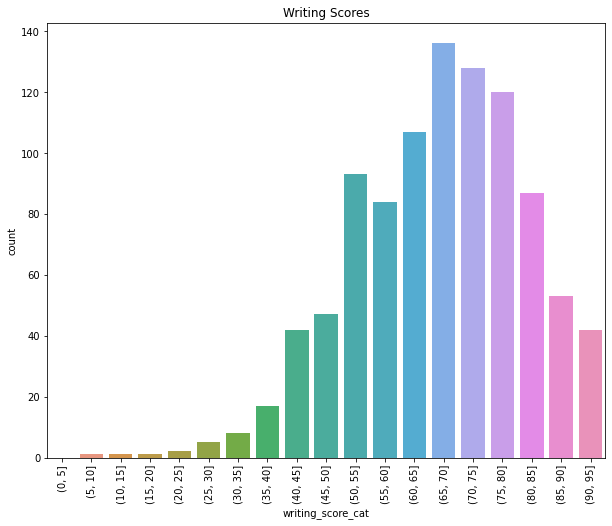

In [74]:
f, ax = plt.subplots(figsize = (10,8))

sns.countplot(data=df, x='writing_score_cat')
plt.xticks(rotation ='90')
plt.title('Writing Scores')
plt.show()

How many students passed the writing exam

In [76]:
passing_mark = 50

df['passed_writing'] = np.where(df['writing score'] >= passing_mark, 'P', 'F')
df['passed_writing'].value_counts() / len(df['passed_writing']) * 100

# when we compare this to passed_math we can see that more people passed the writing exam but only by a small marigin

P    88.6
F    11.4
Name: passed_writing, dtype: float64

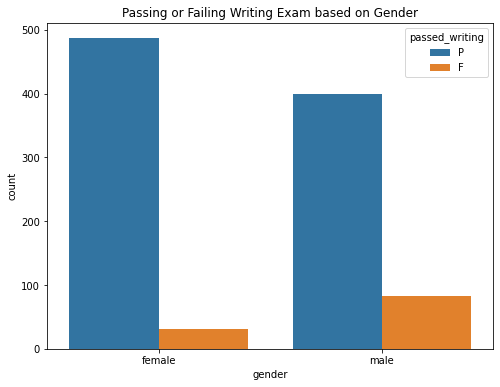

In [81]:
# seeing how gender affects the passing of the writing exam

f, ax = plt.subplots(figsize = (8,6))

sns.countplot(data=df, x='gender', hue = 'passed_writing')
plt.title('Passing or Failing Writing Exam based on Gender')
plt.show()

# we can see that males were more likely to fail the exam

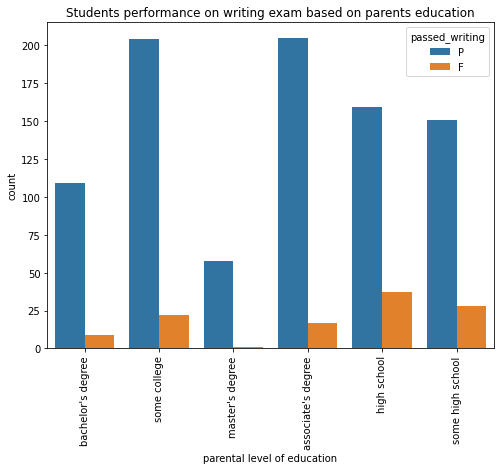

In [85]:
# looking at passing the writing exam based on parental level of education

f, ax = plt.subplots(figsize = (8,6))

sns.countplot(data=df, x='parental level of education', hue = 'passed_writing')
plt.xticks(rotation = '90')
plt.title('Students performance on writing exam based on parents education')
plt.show()

###Finding out how many students passed all three exams

In [90]:
df['overall_pass'] = df.apply(lambda x: 'Fail' if x['math score'] < passing_mark or
                              x['writing score'] < passing_mark or
                              x['reading score'] < passing_mark
                              else 'Pass', axis =1 )

df['overall_pass'].value_counts() / len(df) * 100

Pass    81.2
Fail    18.8
Name: overall_pass, dtype: float64

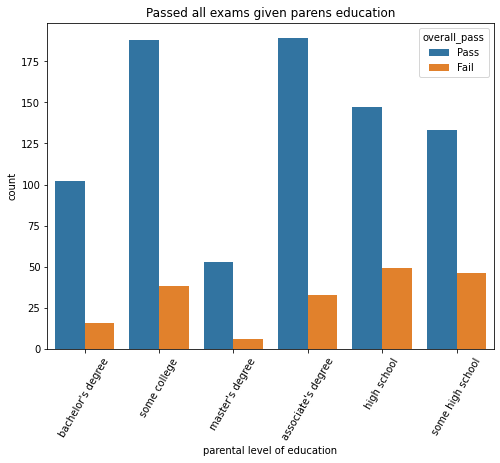

In [93]:
# passed all exams given parents level of education

f, ax = plt.subplots(figsize = (8,6))

sns.countplot(data=df, x='parental level of education', hue='overall_pass')
plt.xticks(rotation = '60')
plt.title("Passed all exams given parens education")
plt.show()

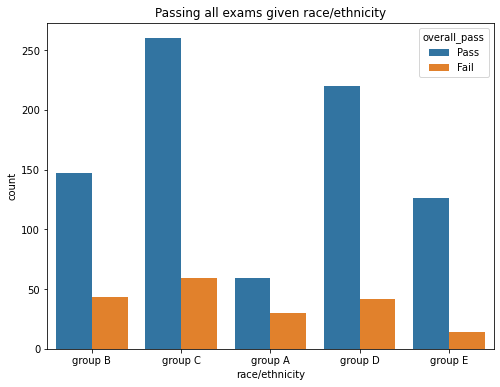

In [96]:
# Passing all three exams given race/ethnicity

f, ax = plt.subplots(figsize = (8,6))

sns.countplot(data=df, x='race/ethnicity', hue = 'overall_pass')
plt.title('Passing all exams given race/ethnicity')
plt.show()

In [100]:
# it appears that group C were most likely to fail all the exams. Lets find out the percentage that passed or failed

group_c_pass = df[(df['race/ethnicity'] == 'group C') & (df['overall_pass'] == 'Pass')]
group_c_pass_rate = len(group_c_pass) / len(df[df['race/ethnicity'] == 'group C']) *100
group_c_pass_rate

81.50470219435736

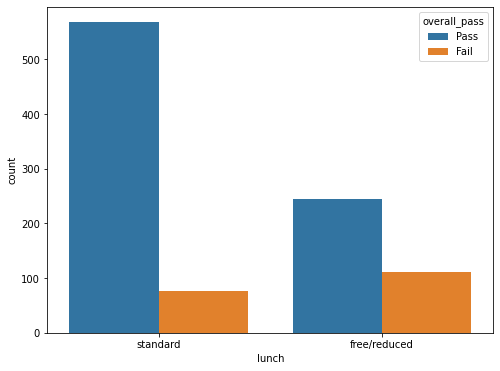

In [105]:
# lets see that overall pass rate based on if the student gets free lunch or not

f, ax = plt.subplots(figsize = (8,6))

sns.countplot(data=df, x='lunch', hue='overall_pass')
plt.title('Students Performance based on lunch plan')
plt.show()

# we can see that unfortunatly students who get free lunch are more likely to fail the exams

In [107]:
### Finding the total percentage of marks

df['Total_Mark'] = (df['math score'] + df['writing score'] + df['reading score']) / 3

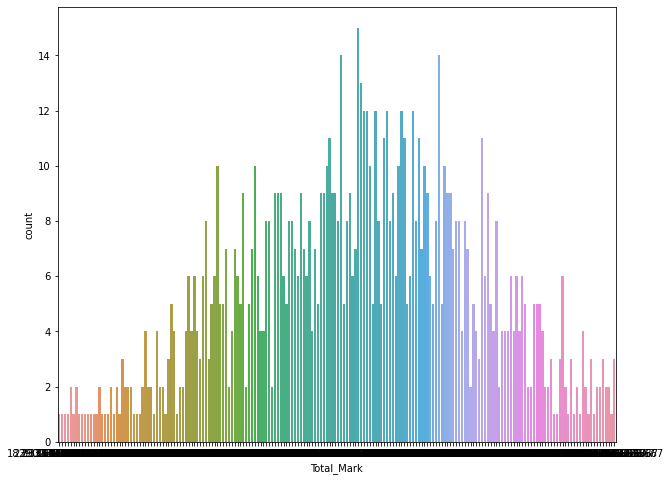

In [111]:
f, ax = plt.subplots(figsize = (10,8))

sns.countplot(data=df, x='Total_Mark')

Text(0.5, 1.0, 'Combined Test Scores')

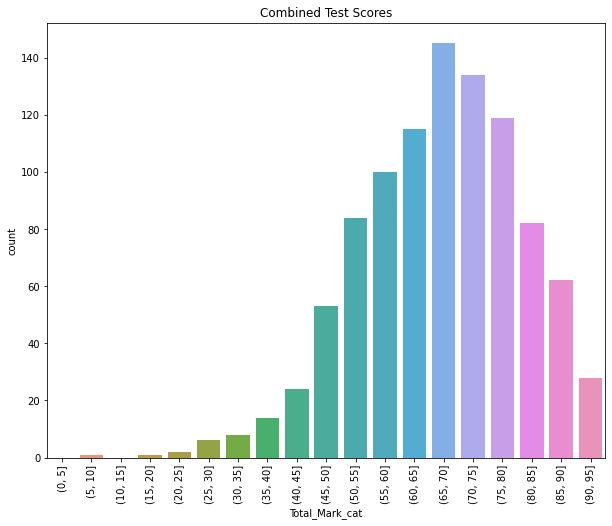

In [115]:
# cleaning up the above chart as I did before with the other ones so it is a lot less clustered

bins = np.arange(0,100,5)

df['Total_Mark_cat'] = pd.cut(df['Total_Mark'], bins=bins)

f, ax = plt.subplots(figsize = (10,8))

sns.countplot(data=df, x='Total_Mark_cat')
plt.xticks(rotation = '90')
plt.title('Combined Test Scores')

In [116]:
def grade(total_mark, overall_pass):
  if overall_pass == 'F':
    return 'F'
  if (total_mark >= 85):
    return 'A'
  if (total_mark >= 75):
    return 'B'
  if (total_mark >=65):
    return 'C'
  if (total_mark) >= 50:
    return 'D'
  else:
    return 'F'

In [120]:
df['Grade'] = df.apply(lambda x: grade(x['Total_Mark'], x['overall_pass']), axis=1)
df['Grade'].value_counts()

D    296
C    277
B    208
A    116
F    103
Name: Grade, dtype: int64

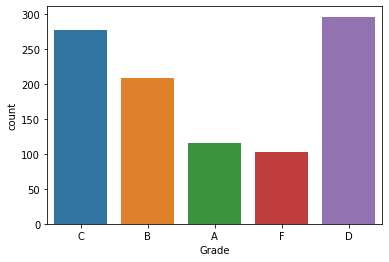

In [121]:
sns.countplot(data=df, x='Grade')

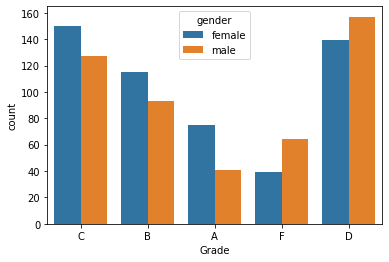

In [122]:
sns.countplot(data=df, x="Grade", hue='gender')

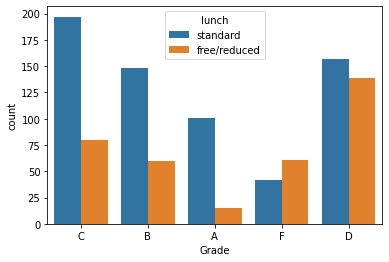

In [123]:
sns.countplot(data=df, x='Grade', hue='lunch')